# Obesity Status Based on Eating Habits and Physical Condition
by Anam Khan, Farah Mallah, Liis Usin, Reihaneh Sadraei

## Explore the data
Loading the dataset and displaying basic information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data set and check the values present

data = pd.read_csv('ObesityDataSet.csv', delimiter=',')
print(str(data.shape[0])+' rows,', len(data.columns), 'columns')
data.sample(5)

2111 rows, 17 columns


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
66,Male,23.000000,1.800000,90.000000,yes,yes,1.000000,3.000000,Always,no,2.000000,no,0.000000,2.0,Frequently,Public_Transportation,Overweight_Level_II
84,Male,25.000000,1.700000,83.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,0.000000,1.0,Sometimes,Public_Transportation,Overweight_Level_II
1561,Male,31.194458,1.726279,110.714711,yes,yes,1.794825,3.914454,Sometimes,no,1.972016,no,0.668963,0.0,no,Automobile,Obesity_Type_II
367,Female,40.000000,1.580000,63.000000,no,yes,2.000000,3.000000,Frequently,no,2.000000,no,3.000000,1.0,Sometimes,Public_Transportation,Overweight_Level_I
1532,Male,22.705772,1.841989,122.024954,yes,yes,3.000000,2.527510,Sometimes,no,1.645338,no,1.025438,0.0,Sometimes,Public_Transportation,Obesity_Type_II


In [3]:
# check if any none/null values

data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [4]:
# basic information about each columns and its dataset
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

### Below we will separate the obesity types into 2 different categories, as overweight and not overweight

In [6]:
# the column to analyze and to categorize
column_name = 'NObeyesdad'

# Get the unique non-numerical values and their counts in the specified column
unique_values_count = data[column_name].value_counts()

# Get the total number of unique non-numerical values
total_unique_values = unique_values_count.shape[0]

print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
print("Value counts:")
print(unique_values_count)

Total unique non-numerical values in 'NObeyesdad': 7
Value counts:
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64


Testing some catagorical values and visualizing them

In [7]:
# the column to analyze
column_name = 'CAEC'

# Get the unique non-numerical values and their counts in the specified column
unique_values_count = data[column_name].value_counts()

# Get the total number of unique non-numerical values
total_unique_values = unique_values_count.shape[0]

print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
print("Value counts:")
print(unique_values_count)

Total unique non-numerical values in 'CAEC': 4
Value counts:
Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64


In [8]:
# the column to analyze
column_name = 'CALC' 

# Get the unique non-numerical values and their counts in the specified column
unique_values_count = data[column_name].value_counts()

# Get the total number of unique non-numerical values
total_unique_values = unique_values_count.shape[0]

print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
print("Value counts:")
print(unique_values_count)

Total unique non-numerical values in 'CALC': 4
Value counts:
Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64


In [9]:
# the column to analyze
column_name = 'MTRANS' 

# Get the unique non-numerical values and their counts in the specified column
unique_values_count = data[column_name].value_counts()

# Get the total number of unique non-numerical values
total_unique_values = unique_values_count.shape[0]

print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
print("Value counts:")
print(unique_values_count)

Total unique non-numerical values in 'MTRANS': 5
Value counts:
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64


In [10]:
# Merging the catagories that have less than 20 occurances into a catagory called other
threshold = 20  
data['MTRANS'] = data['MTRANS'].apply(lambda x: x if data['MTRANS'].value_counts()[x] >= threshold else 'Other')

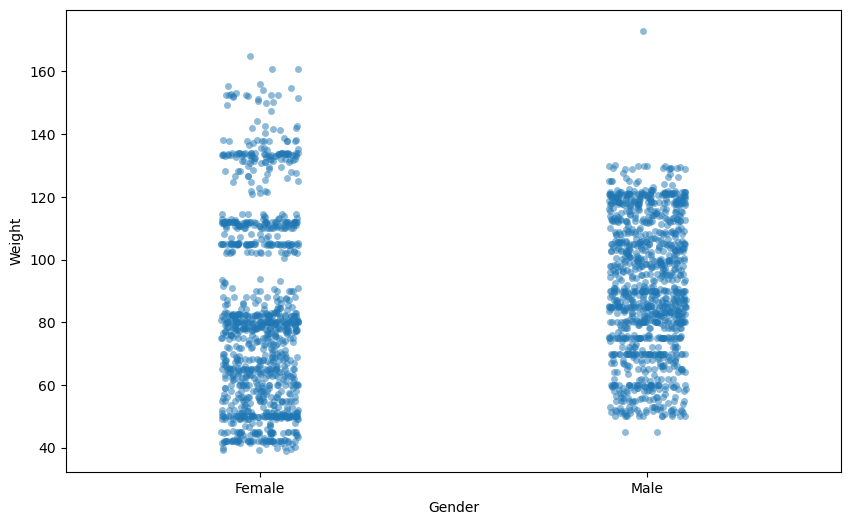

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.stripplot(x=data['Gender'], y=data['Weight'], alpha=0.5, jitter=True, ax=ax)
plt.show()

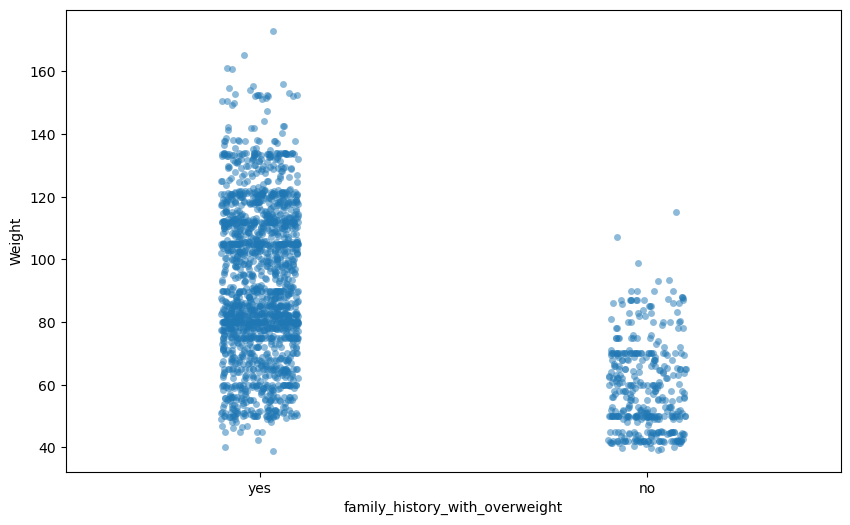

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.stripplot(x=data['family_history_with_overweight'], y=data['Weight'], alpha=0.5, jitter=True, ax=ax)
plt.show()

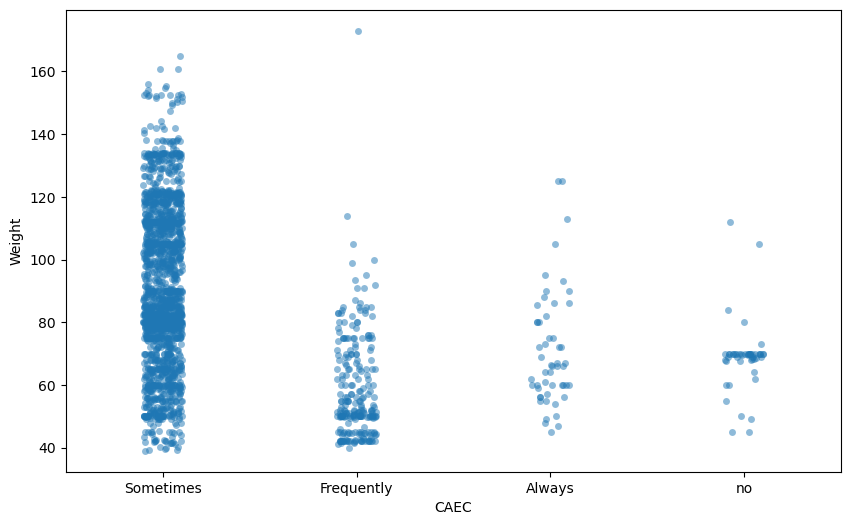

In [35]:
# eating food between meals
fig, ax = plt.subplots(figsize=(10, 6))
sns.stripplot(x=data['CAEC'], y=data['Weight'], alpha=0.5, jitter=True, ax=ax)
plt.show()

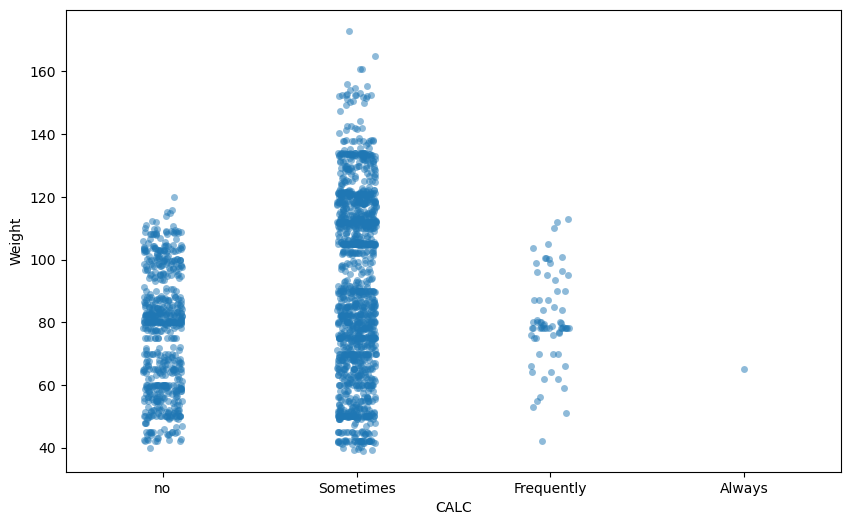

In [36]:
# Consumption of alcohol
fig, ax = plt.subplots(figsize=(10, 6))
sns.stripplot(x=data['CALC'], y=data['Weight'], alpha=0.5, jitter=True, ax=ax)
plt.show()

In [11]:
# # Classify the set into 2 categories
# def classify_overweight(weight_status):
#     overweight_classes = [
#         'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III',
#         'Overweight_Level_I', 'Overweight_Level_II']
#     if weight_status in overweight_classes:
#         return 'Overweight'
#     else:
#         return 'Not Overweight'

In [12]:
# Create a DataFrame from the data
df = pd.DataFrame(data)

In [13]:
# Apply the function to create a new column
# df['Status'] = df['NObeyesdad'].apply(classify_overweight)

In [14]:
# drop the old column
# df = df.drop('NObeyesdad', axis=1)

In [15]:
# check the data again
df.sample(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
596,Male,17.469417,1.798645,59.612717,yes,yes,2.336044,4.000000,Sometimes,no,2.000000,no,2.000000,0.133005,no,Automobile,Insufficient_Weight
980,Male,21.183540,1.720000,80.555875,yes,yes,2.000000,2.468421,Sometimes,no,2.000000,no,2.000000,1.000000,no,Public_Transportation,Overweight_Level_II
2069,Female,24.284833,1.650726,113.774198,yes,yes,3.000000,3.000000,Sometimes,no,2.751370,no,0.324913,0.516764,Sometimes,Public_Transportation,Obesity_Type_III
117,Female,17.000000,1.700000,85.000000,yes,no,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Public_Transportation,Overweight_Level_II
543,Female,23.000000,1.710182,50.287967,yes,yes,2.000000,3.000000,Frequently,no,2.099863,no,1.635810,2.000000,no,Public_Transportation,Insufficient_Weight


In [16]:
# # the column to analyze
# column_name = 'Status'

# # Get the unique non-numerical values and their counts in the specified column
# unique_values_count = data[column_name].value_counts()

# # Get the total number of unique non-numerical values
# total_unique_values = unique_values_count.shape[0]

# print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
# print("Value counts:")
# print(unique_values_count)

## Visualize relationships / plot the data

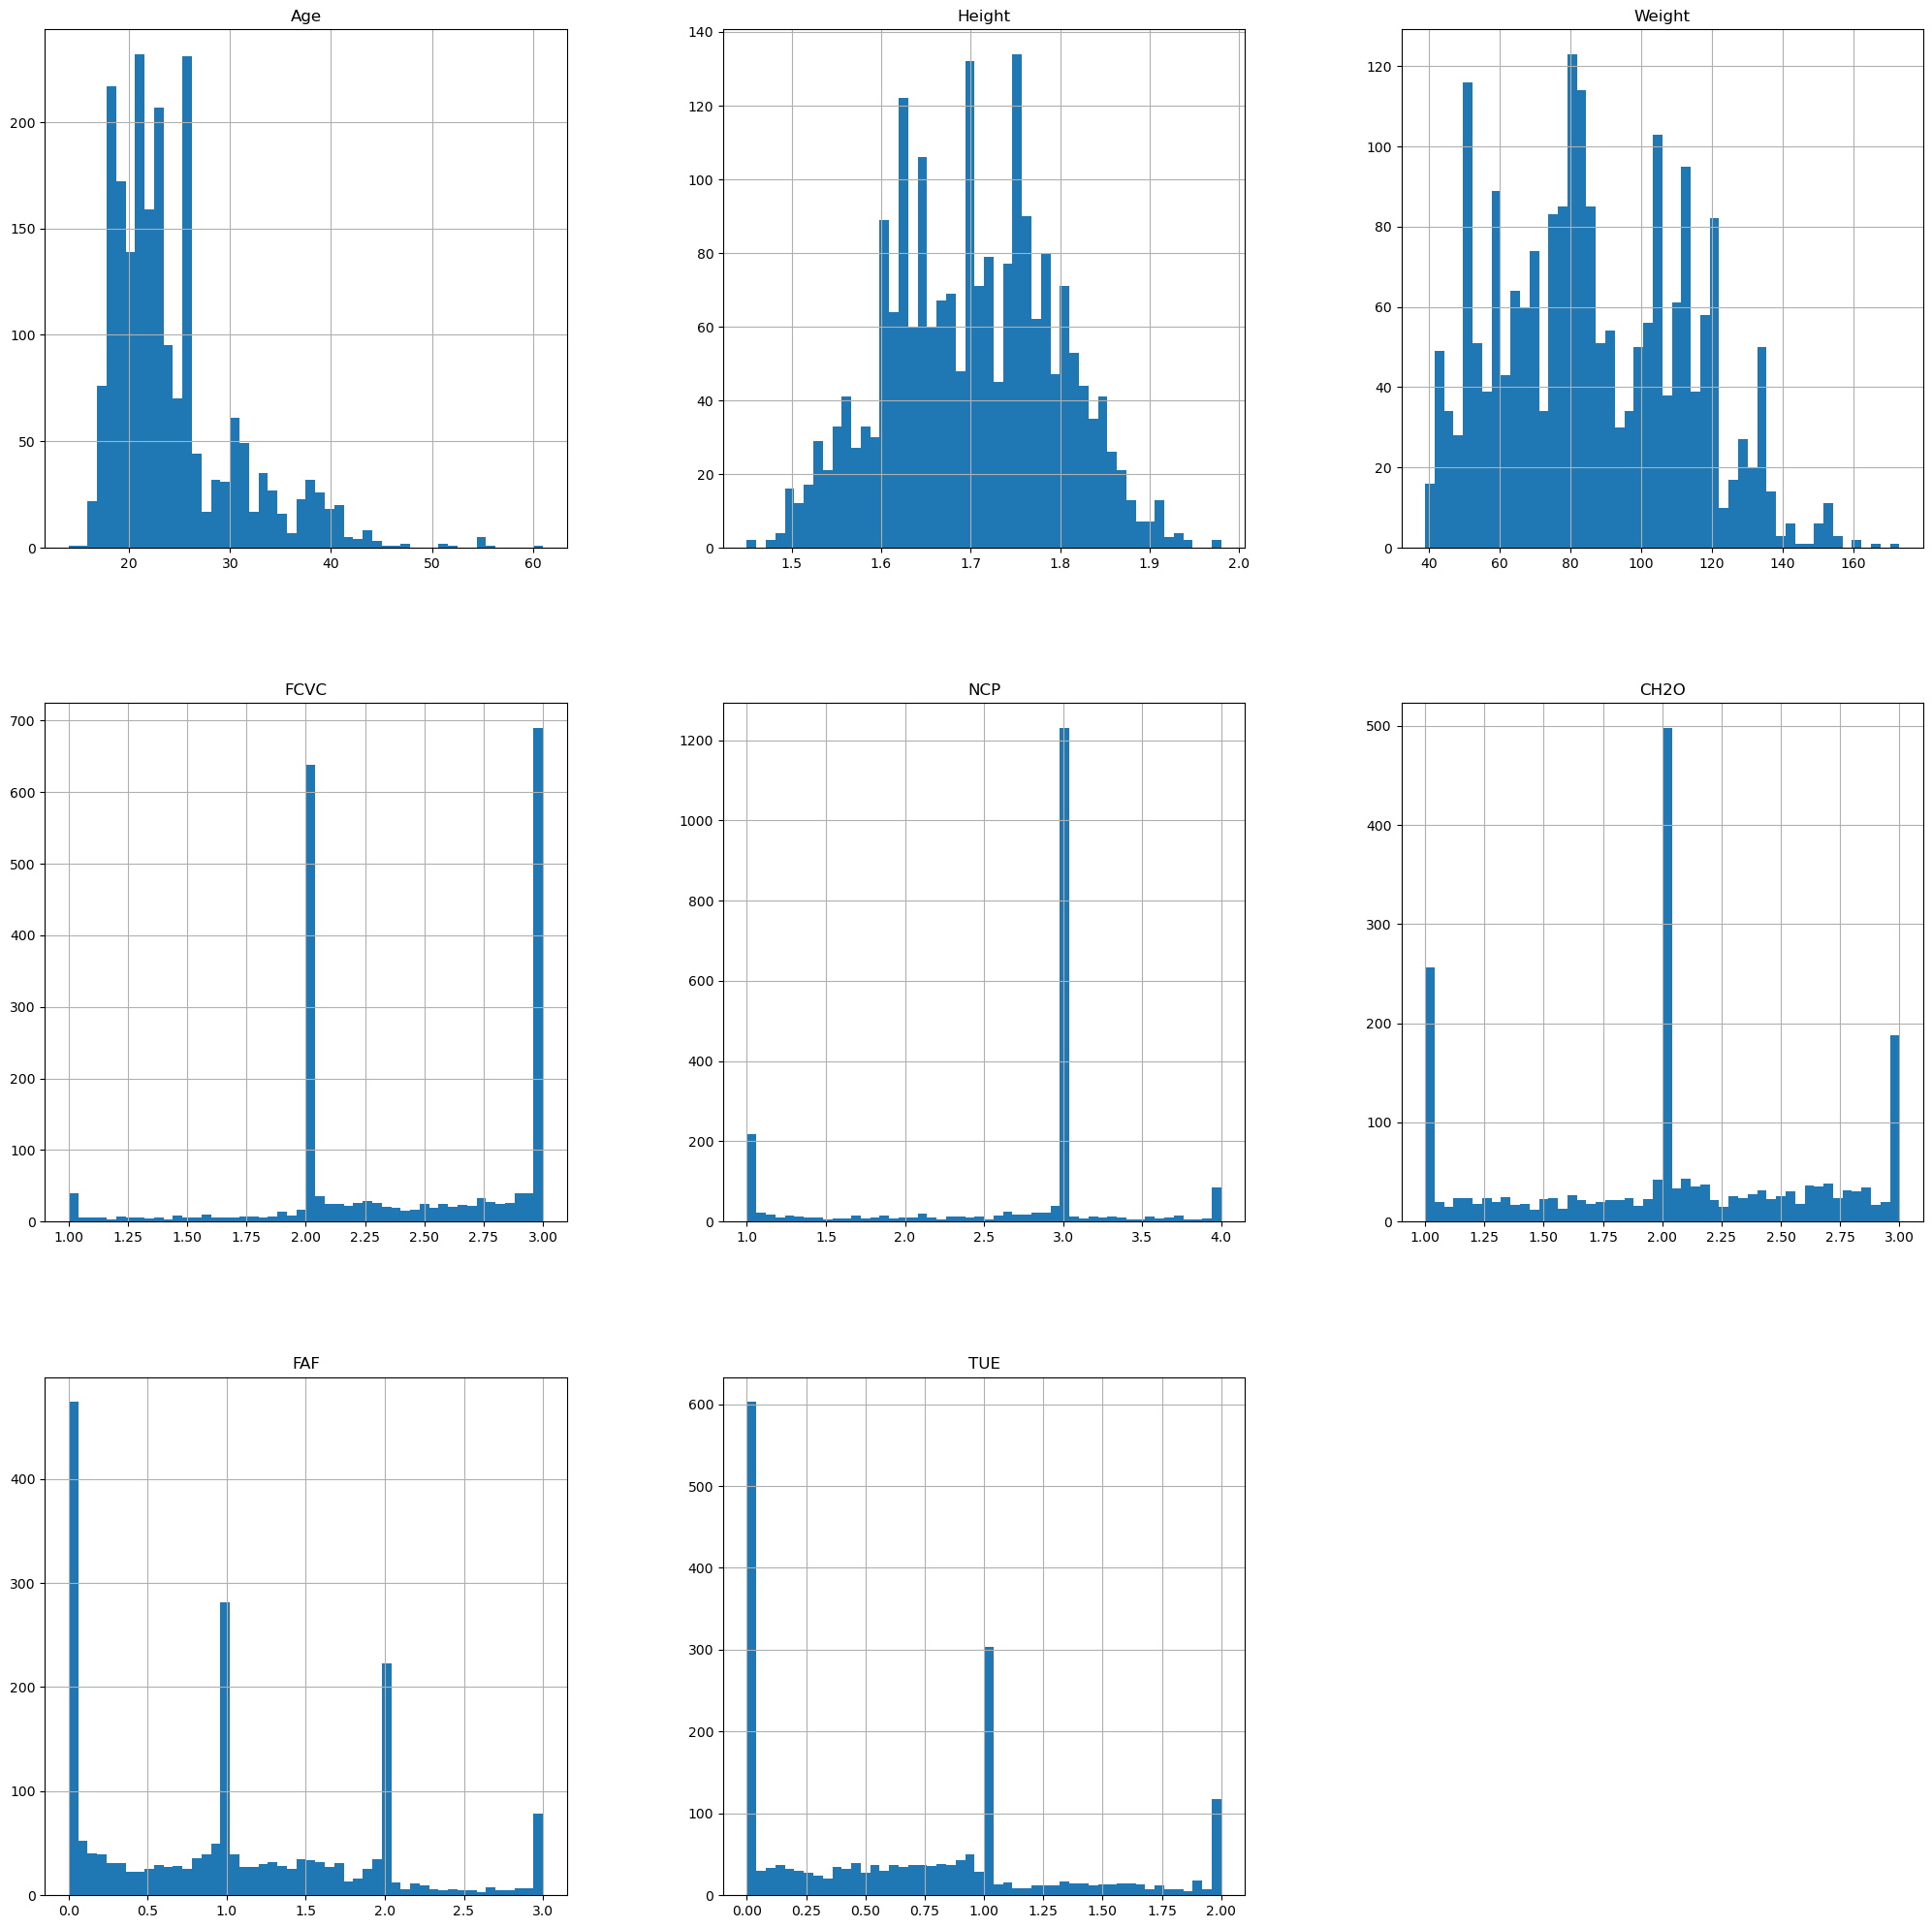

In [17]:
%matplotlib inline
data.hist(bins=50, figsize=(25,25))
plt.show()

In [18]:
df.replace({"NObeyesdad":{        
    "Obesity_Type_III":6, # HIGHEST risk
    "Obesity_Type_II":5,
    "Obesity_Type_I":4,
    "Overweight_Level_II":3,
    "Overweight_Level_I":2,
    "Normal_Weight":1,
    "Insufficient_Weight":0, # lowert risk
}},inplace=True)

The attributes related with the eating habits are:
- Frequent consumption of high caloric food (FAVC),
- Frequency of consumption of vegetables (FCVC),
- Number of main meals (NCP),
- Consumption of food between meals (CAEC),
- Consumption of water daily (CH20),
- and Consumption of alcohol (CALC).

The attributes related with the physical condition are:
- Calories consumption monitoring (SCC),
- Physical activity frequency (FAF),
- Time using technology devices (TUE),
- Transportation used (MTRANS),

<AxesSubplot:>

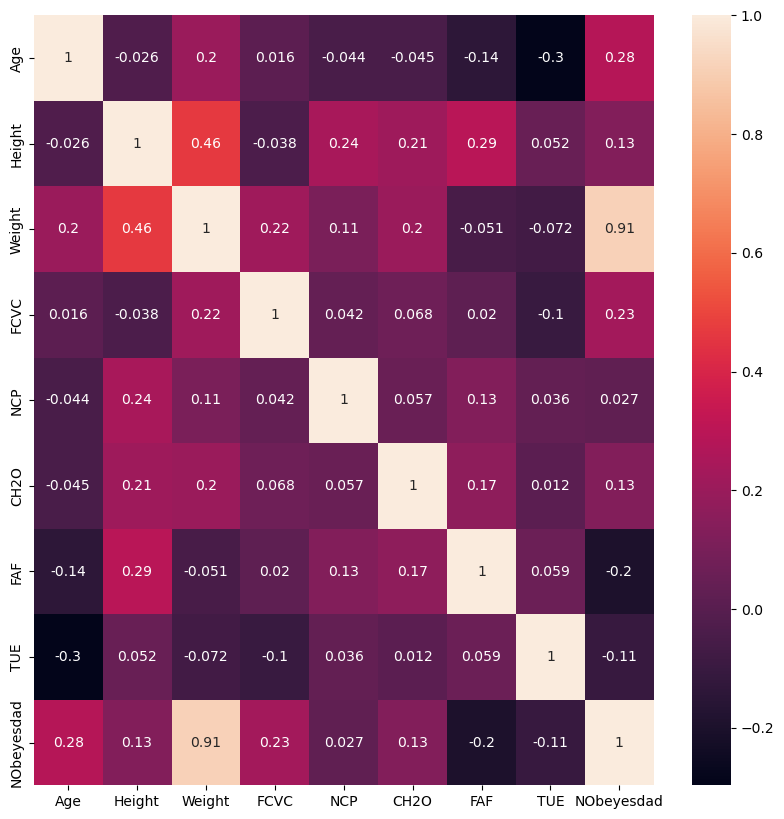

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
corr = data.corr()
sns.heatmap(corr, annot=True)

## Prepare the data
Preparing the data for modeling by handling missing values, encoding categorical features, scaling features, and splitting the data into training and testing sets.

In [20]:
# separating the last column from the rest

# BASED ON WEIGHT
df = df.drop("NObeyesdad", axis=1)


In [21]:
df.sample(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
1746,Male,25.758307,1.766547,115.458450,yes,yes,2.203962,3.000000,Sometimes,no,2.156870,no,1.289421,1.220767,Sometimes,Public_Transportation
724,Female,18.656912,1.574017,41.220175,no,yes,1.649974,1.513835,Sometimes,no,1.549974,no,0.227802,1.972926,Sometimes,Public_Transportation
1085,Female,28.824194,1.700000,78.000000,yes,yes,3.000000,3.000000,Sometimes,no,2.147074,no,1.416076,1.000000,Frequently,Automobile
116,Female,15.000000,1.650000,86.000000,yes,yes,3.000000,3.000000,Sometimes,no,1.000000,no,3.000000,2.000000,no,Walking
1536,Male,25.154620,1.758398,112.089022,yes,yes,1.108663,3.000000,Sometimes,no,2.000000,no,1.230219,0.001716,Sometimes,Automobile


In [22]:
X_original=df.drop(columns="Weight")
y=df["Weight"]

In [23]:
# # Base on label
# X_original=df.drop(columns="NObeyesdad")
# y=df["NObeyesdad"]

In [24]:
# split data to numerical and categorical way

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

def prepare_data(X):
    numeric_columns = X.select_dtypes(exclude='object').columns
    categorical_columns = X.select_dtypes(include='object').columns

    numeric_features = Pipeline([
        ('handlingmissingvalues',SimpleImputer(strategy='median')),
        ('scaling',StandardScaler(with_mean=True))
    ])

    categorical_features = Pipeline([
        ('handlingmissingvalues',SimpleImputer(strategy='most_frequent')),
        ('encoding', OneHotEncoder()),
        ('scaling', StandardScaler(with_mean=False))
    ])

    processing = ColumnTransformer([
        ('numeric', numeric_features, numeric_columns),
        ('categorical', categorical_features, categorical_columns)
    ])

    return processing.fit_transform(X)



# NOTE - add something here that's for regression...



In [25]:
X=prepare_data(X_original)
X

array([[-0.52212439, -0.87558934, -0.7850187 , ...,  0.        ,
         2.30468953,  0.        ],
       [-0.52212439, -1.94759928,  1.08834176, ...,  0.        ,
         2.30468953,  0.        ],
       [-0.20688898,  1.05402854, -0.7850187 , ...,  0.        ,
         2.30468953,  0.        ],
       ...,
       [-0.28190933,  0.54167211,  1.08834176, ...,  0.        ,
         2.30468953,  0.        ],
       [ 0.00777624,  0.40492652,  1.08834176, ...,  0.        ,
         2.30468953,  0.        ],
       [-0.10211908,  0.39834438,  1.08834176, ...,  0.        ,
         2.30468953,  0.        ]])

## Create Training and Test set

In [26]:
# splitting to training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train X dataset shape:',X_train.shape)
print('Train y dataset shape', y_train.shape)
print('Test X dataset shape:',X_test.shape)
print('Test y dataset shape', y_test.shape)

Train X dataset shape: (1688, 29)
Train y dataset shape (1688,)
Test X dataset shape: (423, 29)
Test y dataset shape (423,)


## Helper function

In [27]:
def evaluate_the_model(y_test, y_pred):
    # Evaluating the model

    # Mean Absolute Error (MAE):
    # average absolute difference between the predicted and actual values
    mae = mean_absolute_error(y_test, y_pred)

    # Mean Squared Error (MSE):
    # Performance of a predictive model - the smaller the value the better
    mse = mean_squared_error(y_test, y_pred)

    # Root Mean Squared Error (RMSE):
    # emphasizes larger errors
    rmse = math.sqrt(mse)

    # R-squared (R2):
    # fit of a regression model ~0.8 is good, but not great 
    r2 = r2_score(y_test, y_pred)

    # Mean Absolute Percentage Error (MAPE):
    # percentage difference between the predicted and actual values
    mape = (1/len(y_test)) * sum(abs((y_test - y_pred) / y_test)) * 100
    
    
    print("Mean Absolute Error (MAE) %.2f:" % mae)
    print("Mean Squared Error (MSE) %.2f:" % mse)
    print("Root Mean Squared Error (RMSE) %.2f:" % rmse)
    print("R-squared Score (R^2) %.2f:" % r2)
    print("Mean Absolute Percentage Error (MAPE) %.2f:" % mape)

In [28]:
def display_residualplot(residuals, y_pred):
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Residual Plot')
    plt.show()

# Build ML models

## Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import math

In [30]:
# Creating and training the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

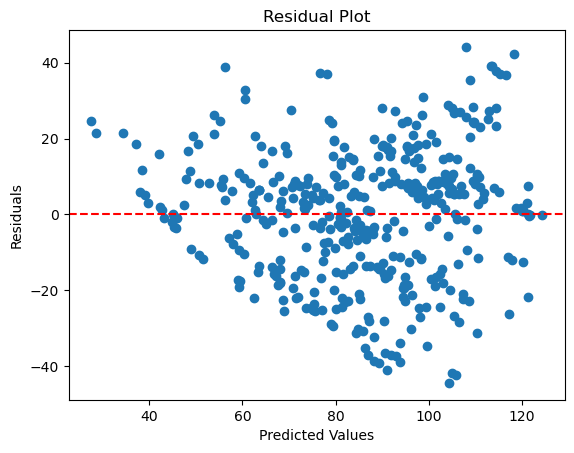

Mean Absolute Error (MAE) 13.79:
Mean Squared Error (MSE) 295.63:
Root Mean Squared Error (RMSE) 17.19:
R-squared Score (R^2) 0.58:
Mean Absolute Percentage Error (MAPE) 17.92:


In [31]:
y_pred1 = linear_model.predict(X_test)
residuals1 = y_test - y_pred1
display_residualplot(residuals1, y_pred1)
evaluate_the_model(y_test, y_pred1)

In [32]:
# OUTLIERS's need to be removed???!